In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [24]:
#loading the dataset
data = pd.read_csv("FlightDelays.csv")
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


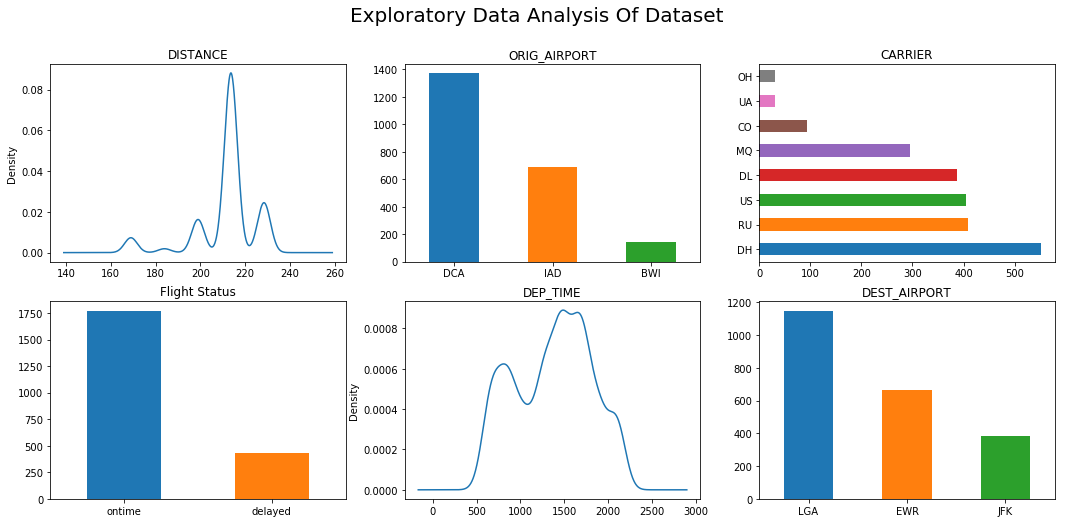

In [25]:
#visualising the data
fig, ax_array = plt.subplots(2,3,figsize=(18,8))
(ax1,ax2,ax3),(ax4,ax5,ax6) = ax_array

fig.suptitle('Exploratory Data Analysis Of Dataset', size = 20)

data['DISTANCE'].plot(kind = 'kde', ax = ax1, title = 'DISTANCE')

orig = data['ORIGIN'].value_counts()
orig.plot(kind = 'bar', ax = ax2, rot = 0, title = 'ORIG_AIRPORT')

carr = data['CARRIER'].value_counts()
carr.plot(kind = 'barh', ax = ax3, title = 'CARRIER')

stat = data['Flight Status'].value_counts()
stat.plot(kind = 'bar', ax = ax4, rot = 0, title = 'Flight Status')

data['CRS_DEP_TIME'].plot(kind = 'kde', ax = ax5, title = 'DEP_TIME')

dest = data['DEST'].value_counts()
dest.plot(kind = 'bar', ax = ax6, rot = 0, title = 'DEST_AIRPORT')

In [26]:
#modifying the data by dropping Flight Numbers and Tail Numbers variables
data_modif = data.drop(['FL_NUM','TAIL_NUM'], axis = 1)
data_modif.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,BWI,0,4,1,ontime
1,1640,DH,1640,JFK,213,01/01/2004,DCA,0,4,1,ontime
2,1245,DH,1245,LGA,229,01/01/2004,IAD,0,4,1,ontime
3,1715,DH,1709,LGA,229,01/01/2004,IAD,0,4,1,ontime
4,1039,DH,1035,LGA,229,01/01/2004,IAD,0,4,1,ontime


In [27]:
#label encoding the output feature
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data_modif['Flight Status'] = le.fit_transform(data_modif['Flight Status'])
data_modif.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,BWI,0,4,1,1
1,1640,DH,1640,JFK,213,01/01/2004,DCA,0,4,1,1
2,1245,DH,1245,LGA,229,01/01/2004,IAD,0,4,1,1
3,1715,DH,1709,LGA,229,01/01/2004,IAD,0,4,1,1
4,1039,DH,1035,LGA,229,01/01/2004,IAD,0,4,1,1


In [28]:
#creating dummy variables for categorical features like 'CARRIER','DEST','FL_DATE','ORIGIN'
data_dummy = pd.get_dummies(data_modif)
data_dummy.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status,CARRIER_CO,CARRIER_DH,CARRIER_DL,...,FL_DATE_1/25/2004,FL_DATE_1/26/2004,FL_DATE_1/27/2004,FL_DATE_1/28/2004,FL_DATE_1/29/2004,FL_DATE_1/30/2004,FL_DATE_1/31/2004,ORIGIN_BWI,ORIGIN_DCA,ORIGIN_IAD
0,1455,1455,184,0,4,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1640,1640,213,0,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1245,1245,229,0,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1715,1709,229,0,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1039,1035,229,0,4,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
#splitting the dataset into 60% train and 40% test data
from sklearn.model_selection import train_test_split
y = data_dummy['Flight Status']
X = data_dummy.loc[:, data_dummy.columns != 'Flight Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=50)
matrix_ytrain = np.array(y_train).reshape(1,1320)

H:\kil\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The input features are : 
Index(['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'Weather', 'DAY_WEEK',
       'DAY_OF_MONTH', 'CARRIER_CO', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ',
       'CARRIER_OH', 'CARRIER_RU', 'CARRIER_UA', 'CARRIER_US', 'DEST_EWR',
       'DEST_JFK', 'DEST_LGA', 'FL_DATE_01/01/2004', 'FL_DATE_01/02/2004',
       'FL_DATE_01/03/2004', 'FL_DATE_01/04/2004', 'FL_DATE_01/05/2004',
       'FL_DATE_01/06/2004', 'FL_DATE_01/07/2004', 'FL_DATE_01/08/2004',
       'FL_DATE_01/09/2004', 'FL_DATE_01/10/2004', 'FL_DATE_01/11/2004',
       'FL_DATE_01/12/2004', 'FL_DATE_1/13/2004', 'FL_DATE_1/14/2004',
       'FL_DATE_1/15/2004', 'FL_DATE_1/16/2004', 'FL_DATE_1/17/2004',
       'FL_DATE_1/18/2004', 'FL_DATE_1/19/2004', 'FL_DATE_1/20/2004',
       'FL_DATE_1/21/2004', 'FL_DATE_1/22/2004', 'FL_DATE_1/23/2004',
       'FL_DATE_1/24/2004', 'FL_DATE_1/25/2004', 'FL_DATE_1/26/2004',
       'FL_DATE_1/27/2004', 'FL_DATE_1/28/2004', 'FL_DATE_1/29/2004',
       'FL_DATE_1/30/2004', 'FL_DAT

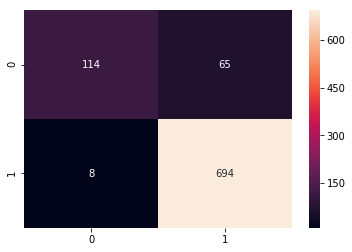

In [30]:
#fitting the logistic regression model on data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
reg = logreg.fit(X_train,y_train)
print('The input features are : ')  #printing the names of the features
print(X_train.columns)
print('The corresponding coefficients (weights) of these features respectively are : ')
print(reg.coef_)                     #printing the corresponding coefficients
y_pred = reg.predict(X_test)  # predicting
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(reg.score(X_test,y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True,fmt = "d")
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [31]:
#measures of model performance on test set

#root mean square error
from sklearn.metrics import mean_squared_error
import math
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error', mse)
#r squared error
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred)
print('r_squared value', r_square)

Root mean square error 0.2878548000730318
r_squared value 0.4881901669611167


In [32]:
#performing variable selection using tree based feature selection using rfe
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
#create rfe object and rank each pixel
clf_rf_3 = RandomForestClassifier()
rfe = RFE(estimator = clf_rf_3, n_features_to_select = 15, step = 1)
rfe = rfe.fit(X_train, y_train)
#printing the selected features
print('Chosen best 15 feature by rfe:', X_train.columns[rfe.support_])

H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100

Chosen best 15 feature by rfe: Index(['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'Weather', 'DAY_WEEK',
       'DAY_OF_MONTH', 'CARRIER_DH', 'CARRIER_MQ', 'CARRIER_US', 'DEST_EWR',
       'FL_DATE_1/15/2004', 'FL_DATE_1/16/2004', 'FL_DATE_1/18/2004',
       'FL_DATE_1/27/2004', 'ORIGIN_DCA'],
      dtype='object')


H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 1 (0.239783)
2. feature 0 (0.155999)
3. feature 5 (0.068203)
4. feature 4 (0.049450)
5. feature 3 (0.037691)
6. feature 2 (0.037508)
7. feature 32 (0.022048)
8. feature 42 (0.020953)
9. feature 31 (0.019406)
10. feature 8 (0.018799)
11. feature 34 (0.018116)
12. feature 7 (0.017961)
13. feature 21 (0.017845)
14. feature 9 (0.017583)
15. feature 16 (0.016697)
16. feature 43 (0.016548)
17. feature 14 (0.016081)
18. feature 49 (0.015447)
19. feature 15 (0.013589)
20. feature 50 (0.013269)
21. feature 13 (0.013091)
22. feature 11 (0.012909)
23. feature 30 (0.010142)
24. feature 20 (0.009611)
25. feature 44 (0.008462)
26. feature 39 (0.008116)
27. feature 24 (0.007705)
28. feature 6 (0.007464)
29. feature 22 (0.006285)
30. feature 29 (0.006224)
31. feature 25 (0.006140)
32. feature 37 (0.006017)
33. feature 23 (0.006003)
34. feature 28 (0.005889)
35. feature 26 (0.005740)
36. feature 36 (0.004559)
37. feature 48 (0.004394)
38. feature 35 (0.004309)
39. feature 38

H:\kil\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


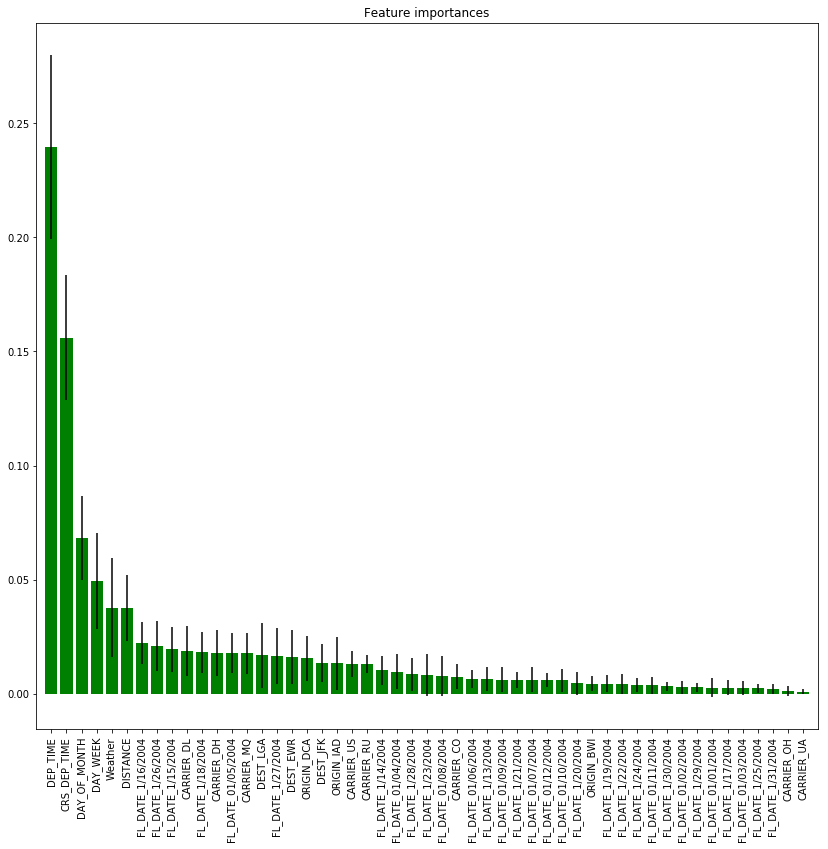

In [33]:
#tree based feature selection
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train,y_train)
importances = clf_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis = 0)
indices = np.argsort(importances)[::-1]

#print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    
#plotting the feature importances of the forest    
plt.figure(1, figsize = (14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color = "g", yerr = std[indices], align = "center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation = 90)
plt.xlim([-1, X_train.shape[1]])
plt.show()    

In [34]:
#dropping the features which are of less importance
data_extracted = data_dummy.drop(['FL_DATE_1/26/2004','FL_DATE_1/23/2004','FL_DATE_1/28/2004','FL_DATE_01/08/2004','FL_DATE_01/09/2004','FL_DATE_1/21/2004','FL_DATE_01/04/2004','FL_DATE_01/12/2004','FL_DATE_1/22/2004','FL_DATE_1/30/2004','FL_DATE_01/10/2004','FL_DATE_01/07/2004','FL_DATE_1/14/2004','FL_DATE_01/06/2004','FL_DATE_1/19/2004','FL_DATE_1/13/2004','FL_DATE_1/24/2004','FL_DATE_01/11/2004','FL_DATE_1/20/2004','FL_DATE_1/29/2004','FL_DATE_1/17/2004','FL_DATE_1/25/2004','FL_DATE_01/02/2004','FL_DATE_1/31/2004','FL_DATE_01/03/2004','FL_DATE_01/01/2004','CARRIER_RU','CARRIER_CO','CARRIER_UA','CARRIER_OH','DEST_EWR','DEST_JFK','ORIGIN_IAD','ORIGIN_BWI'],axis = 1)
data_extracted.head()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status,CARRIER_DH,CARRIER_DL,CARRIER_MQ,CARRIER_US,DEST_LGA,FL_DATE_01/05/2004,FL_DATE_1/15/2004,FL_DATE_1/16/2004,FL_DATE_1/18/2004,FL_DATE_1/27/2004,ORIGIN_DCA
0,1455,1455,184,0,4,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1640,1640,213,0,4,1,1,1,0,0,0,0,0,0,0,0,0,1
2,1245,1245,229,0,4,1,1,1,0,0,0,1,0,0,0,0,0,0
3,1715,1709,229,0,4,1,1,1,0,0,0,1,0,0,0,0,0,0
4,1039,1035,229,0,4,1,1,1,0,0,0,1,0,0,0,0,0,0


In [35]:
#splitting the new data after considering only important features into train and test 
from sklearn.model_selection import train_test_split
y = data_extracted['Flight Status']
X = data_extracted.loc[:, data_extracted.columns != 'Flight Status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=50)
matrix_ytrain = np.array(y_train).reshape(1,1320)

H:\kil\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The important input features are : 
Index(['CRS_DEP_TIME', 'DEP_TIME', 'DISTANCE', 'Weather', 'DAY_WEEK',
       'DAY_OF_MONTH', 'CARRIER_DH', 'CARRIER_DL', 'CARRIER_MQ', 'CARRIER_US',
       'DEST_LGA', 'FL_DATE_01/05/2004', 'FL_DATE_1/15/2004',
       'FL_DATE_1/16/2004', 'FL_DATE_1/18/2004', 'FL_DATE_1/27/2004',
       'ORIGIN_DCA'],
      dtype='object')
The corresponding coefficients (weights) of these features respectively are : 
[[ 0.04955612 -0.0499342   0.01019527 -1.30356179  0.09293504 -0.0236487
   0.79136528  0.75233439 -0.49265643 -0.41747653 -0.0299255  -0.03987536
  -0.75941317 -1.01035149 -1.12720697 -0.75341826  0.0071307 ]]
Accuracy of Logistic regression classifier on test set: 0.91
<function confusion_matrix at 0x000001EA1815ED08>
              precision    recall  f1-score   support

           0       0.90      0.60      0.72       179
           1       0.91      0.98      0.94       702

   micro avg       0.91      0.91      0.91       881
   macro avg       0

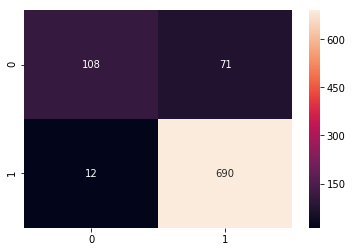

In [36]:
#fitting the new model on the new data with only important features
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
reg = logreg.fit(X_train,y_train)
print('The important input features are : ')  #printing the names of the important features
print(X_train.columns)
print('The corresponding coefficients (weights) of these features respectively are : ')
print(reg.coef_)                 #printing the coefficients of those important features
y_pred = reg.predict(X_test)    #predicting
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(reg.score(X_test,y_test)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True,fmt = "d")
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [37]:
#measures of model performance on test set

#root mean square error
from sklearn.metrics import mean_squared_error
import math
mse = math.sqrt(mean_squared_error(y_test, y_pred))
print('Root mean square error', mse)
#r squared error
from sklearn.metrics import r2_score
r_square = r2_score(y_test, y_pred)
print('r_squared value', r_square)

Root mean square error 0.3069383060535814
r_squared value 0.41807923092839305
